readme: this file is used to get a sample pool of properties

In [60]:
import os
os.chdir('/Users/liyuan/desktop/SI699/codes')
import pandas as pd
import numpy as np
import time
import random
import seaborn as sns

from ts_modeling_v2 import TsModeling
from reformat_data_by_day import Reformat_data
from time_feature_modeling import TimeFeatureModeling
from help import sample_data, get_rmse, get_predictions,extract_time_features

In [2]:
# load all data
train = pd.read_csv('../expedia_data/train.csv')
test = pd.read_csv('../expedia_data/test.csv')
cols_train_only = [col for col in train.columns.unique().tolist() if col not in test.columns.unique().tolist()]
train = train.drop(columns = cols_train_only)
all_data = pd.concat([train, test], ignore_index=True)
print('there are %d records in train and test data combined' % len(all_data))

there are 16540159 records in train and test data combined


In [36]:
# get a dictionary of prop and its number of valid daily records
def process_data_by_prop(prop_data):
    prop_data['date_time'] = pd.to_datetime(prop_data.date_time)
    prop_data = prop_data.set_index('date_time')
    prop_data = prop_data[['price_usd']]
    return prop_data 

def get_prop_daily_data(all_data, threshold = 200):
    '''get propert with its number of records (only selecting prop that meeting certain threshold) '''
    prop_id_lst = all_data['prop_id'].unique().tolist()
    print('there are %d property id'%len(prop_id_lst))
    prop_data_size = {}
    # random sample prop_id from all prop_id
    for prop_id in random.sample(prop_id_lst, 1000):
        # get data by property id
        prop_data = all_data[all_data['prop_id'] == prop_id]
        #print('property has %d records' % len(prop_data))
        prop_data = process_data_by_prop(prop_data)
        daily_price = prop_data[['price_usd']].resample('D').median()
        # manually set threshold to be 200
        if len(daily_price.dropna()) > threshold:
            prop_data_size[prop_id] = len(daily_price.dropna())
    return prop_data_size

prop_data_size = get_prop_daily_data(all_data)

there are 140821 property id


/anaconda3/envs/leetcode/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


75 percentile threshold is 236 records


/anaconda3/envs/leetcode/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[14840,
 134232,
 91687,
 75972,
 90312,
 10906,
 45080,
 32114,
 114209,
 73173,
 38758,
 114304,
 28884]

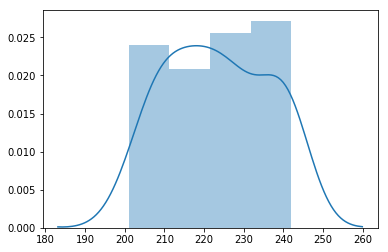

In [62]:
def get_prop_above_percentile(prop_data_size, percentile = 75):
    ''' get a list of sampled properties that have daily records larger than percentile threshold'''
    # plot distribution of daily price records of each prop_id
    sns.distplot(list(prop_data_size.values()))
    # get percentile of prop_data_size
    percnt = np.percentile(list(prop_data_size.values()), percentile)
    print('%d percentile threshold is %d records'%(percentile, percnt))
    # Get prop_id above the percentile threshold
    sampled_props = [prop_id for prop_id in prop_data_size.keys() if prop_data_size[prop_id] > percnt]
    return sampled_props

get_prop_above_percentile(prop_data_size, percentile = 75)